## Part 2 - Classification and Clustering

Import data

In [14]:
%pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import xgboost as XGB

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Load dataset
df = pd.read_csv("./Extended_Lap_Data_Updated_unique_v5.csv")

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled DataFrame to a new CSV file
shuffled_file_path = "./Extended_Lap_Data_Updated_unique_v5_shuffled.csv"
df.to_csv(shuffled_file_path, index=False)

print(f"Shuffled CSV file saved to {shuffled_file_path}")
df

Shuffled CSV file saved to ./Extended_Lap_Data_Updated_unique_v5_shuffled.csv


,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,velocity,lap time,vehicle_name,lap,vehicle_type,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,16.761557,0.008330,144.970090,55.193212,8.874851,6.914119,44.901266,vehicle.tesla.cybertruck,245,Truck,...,98.503029,53.5,1600.0,3200.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
1,15.253209,0.002482,166.013005,43.163813,2.997979,2.455143,43.318199,vehicle.toyota.prius,314,Car,...,93.373116,37.0,800.0,1600.0,3.0,20.0,3000.0,-11518.075195,5544.257324,93.373116
2,15.713101,0.002494,271.003099,33.472689,2.691240,5.781884,47.059081,vehicle.vespa.zx125,20,Motorcycle,...,73.714622,21.5,1500.0,3000.0,2.0,17.0,1000.0,-137.477127,2441.143555,73.714622
3,15.302518,0.006131,165.632373,50.571982,3.165107,5.176160,42.442205,vehicle.nissan.patrol_2021,38,Car,...,89.348190,45.0,1500.0,3000.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
4,15.343909,0.007834,142.860484,50.310407,7.980856,7.235589,46.354878,vehicle.tesla.cybertruck,308,Truck,...,98.503029,53.5,1600.0,3200.0,2.0,17.0,1000.0,-4433.316406,20.970810,98.503029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,14.380167,0.007294,175.731187,49.069397,5.159092,3.092050,42.525907,vehicle.nissan.patrol_2021,235,Car,...,89.348190,45.0,1500.0,3000.0,5.0,20.0,4000.0,-1688.020142,12930.127930,89.348366
8496,16.022074,0.005379,191.933611,44.132699,7.266676,3.789209,43.501336,vehicle.mini.cooper_s_2021,192,Car,...,88.880165,37.5,500.0,1000.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8497,14.971989,0.005382,192.443201,45.178941,7.104845,4.981060,43.923082,vehicle.mini.cooper_s_2021,391,Car,...,88.880165,37.5,500.0,1000.0,1.0,17.0,3000.0,3398.295166,12957.139648,88.880165
8498,15.597976,0.012453,238.039968,49.891043,3.137115,4.156630,44.292306,vehicle.carlamotors.carlacola,361,Truck,...,89.066559,46.0,2700.0,5400.0,5.0,20.0,3000.0,1839.163330,2566.663330,89.066559


In [27]:
df = df.drop(
    columns=[
        'lap time','mass','center_of_mass_z', 'front_left_wheel_long_stiff_value',
        'front_left_wheel_position_x', 'front_left_wheel_position_y',
       'front_left_wheel_position_z', 'front_right_wheel_long_stiff_value',
       'front_right_wheel_position_z', 'rear_left_wheel_radius',
       'rear_left_wheel_max_handbrake_torque',
       'rear_left_wheel_long_stiff_value', 'rear_left_wheel_position_y', 'gear_switch_time', 'front_left_wheel_radius',
       'front_left_wheel_max_brake_torque', 'front_right_wheel_radius',
       'front_right_wheel_max_brake_torque', 'front_right_wheel_position_x',
       'front_right_wheel_position_y', 'rear_left_wheel_max_brake_torque',
       'rear_left_wheel_position_z', 'rear_right_wheel_radius',
       'rear_right_wheel_max_brake_torque',
       'rear_right_wheel_max_handbrake_torque', 'fuel_consumption', 'total_steering', 'total_throttle', 'lap_time',
       'center_of_mass_x', 'clutch_strength','max_rpm', 'front_left_wheel_max_steer_angle',
       'front_right_wheel_max_steer_angle',
       'front_right_wheel_lat_stiff_max_load', 'rear_left_wheel_position_x',
       'rear_right_wheel_lat_stiff_max_load',
       'rear_right_wheel_long_stiff_value', 'rear_right_wheel_position_x',
       'rear_right_wheel_position_y', 'rear_right_wheel_position_z'] ,errors="ignore",
)

In [28]:
df

,average_speed,total_brake,velocity,vehicle_name,lap,vehicle_type,drag_coefficient,front_left_wheel_lat_stiff_max_load,front_left_wheel_lat_stiff_value,front_right_wheel_lat_stiff_value,rear_left_wheel_lat_stiff_max_load,rear_left_wheel_lat_stiff_value,rear_right_wheel_lat_stiff_value
0,16.761557,8.874851,6.914119,vehicle.tesla.cybertruck,245,Truck,0.3,2.0,17.0,17.0,2.0,17.0,17.0
1,15.253209,2.997979,2.455143,vehicle.toyota.prius,314,Car,0.3,3.0,20.0,20.0,3.0,20.0,20.0
2,15.713101,2.691240,5.781884,vehicle.vespa.zx125,20,Motorcycle,0.3,2.0,17.0,17.0,2.0,17.0,17.0
3,15.302518,3.165107,5.176160,vehicle.nissan.patrol_2021,38,Car,0.3,5.0,20.0,20.0,5.0,20.0,20.0
4,15.343909,7.980856,7.235589,vehicle.tesla.cybertruck,308,Truck,0.3,2.0,17.0,17.0,2.0,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,14.380167,5.159092,3.092050,vehicle.nissan.patrol_2021,235,Car,0.3,5.0,20.0,20.0,5.0,20.0,20.0
8496,16.022074,7.266676,3.789209,vehicle.mini.cooper_s_2021,192,Car,0.3,1.0,17.0,17.0,1.0,17.0,17.0
8497,14.971989,7.104845,4.981060,vehicle.mini.cooper_s_2021,391,Car,0.3,1.0,17.0,17.0,1.0,17.0,17.0
8498,15.597976,3.137115,4.156630,vehicle.carlamotors.carlacola,361,Truck,0.3,5.0,20.0,20.0,5.0,20.0,20.0


In [29]:
# Basic data exploration
print(f"Dataset shape: {df.shape}")
print(f"Vehicle types and counts: \n{df['vehicle_type'].value_counts()}")
print(f"Missing values: \n{df.isnull().sum().sum()}")

# Handle any missing values if they exist
df = df.dropna()

# Exploratory data analysis - visualize relationship between features and vehicle type
# plt.figure(figsize=(12, 8))
# sns.boxplot(x="vehicle_type", y="average_speed", data=df)
# plt.title("Average Speed by Vehicle Type")
# plt.show()

# plt.figure(figsize=(12, 8))
# sns.boxplot(x="vehicle_type", y="mass", data=df)
# plt.title("Mass by Vehicle Type")
# plt.show()

# plt.figure(figsize=(12, 8))
# sns.boxplot(x="vehicle_type", y="lap time", data=df)
# plt.title("Lap Time by Vehicle Type")
# plt.show()


# Create feature matrix and target vector
X = df.drop(
    columns=["vehicle_type", "vehicle_name", "lap"]
)  # Remove unnecessary columns
y = df["vehicle_type"]

# Convert lap time to numeric if not already
if "lap time" in X.columns:
    X = X.rename(columns={"lap time": "lap_time"})

# Encode categorical variables if any remain
categorical_cols = X.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(
    f"Encoded class mapping: {dict(zip(le_target.classes_, range(len(le_target.classes_))))}"
)


Dataset shape: (8500, 13)
Vehicle types and counts: 
vehicle_type
Car           3500
Motorcycle    2000
Truck         1500
Van           1500
Name: count, dtype: int64
Missing values: 
0
Encoded class mapping: {'Car': 0, 'Motorcycle': 1, 'Truck': 2, 'Van': 3}


In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


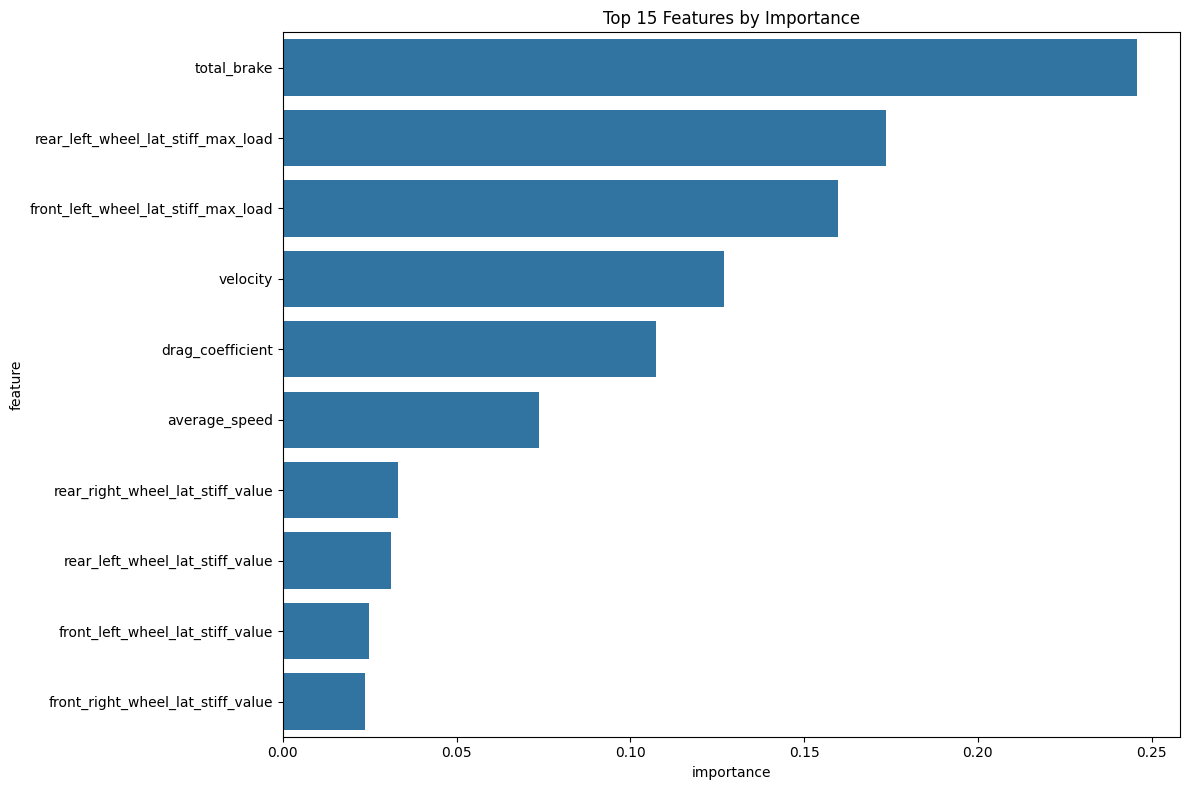

Selected features: Index(['total_brake', 'velocity', 'drag_coefficient',
       'front_left_wheel_lat_stiff_max_load',
       'rear_left_wheel_lat_stiff_max_load'],
      dtype='object')


In [31]:
# Feature importance-based selection
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_scaled, y_train)

# Plot feature importance
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_selector.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance.head(15))
plt.title("Top 15 Features by Importance")
plt.tight_layout()
plt.show()

# Select top features
selector = SelectFromModel(rf_selector, prefit=True, threshold="median")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 120}
Best cross-validation score: 0.9398
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.9388
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation score: 0.9402
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best cross-validation score: 0.7089

Random Forest Results:
Accuracy: 0.9302
              precision    recall  f1-score   support

         Car       1.00      1.00      1.00      1050
  Motorcycle       0.99      0.81      0.89       600
       Truck       0.98      0.89      0.93       450
         

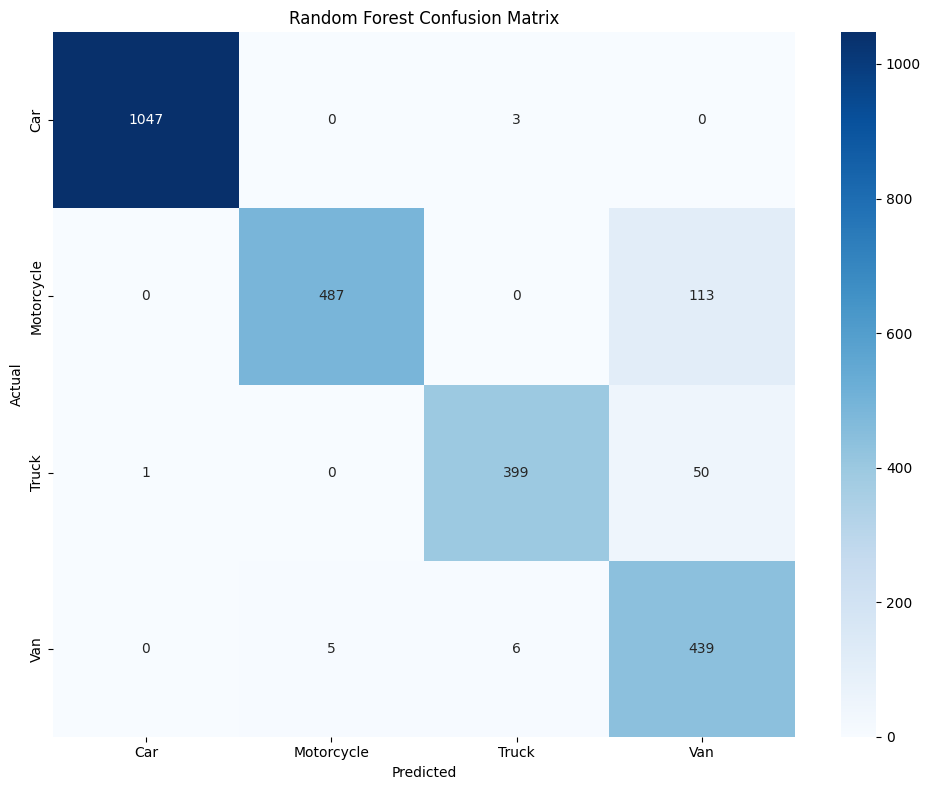


Gradient Boosting Results:
Accuracy: 0.9314
              precision    recall  f1-score   support

         Car       1.00      1.00      1.00      1050
  Motorcycle       0.99      0.81      0.89       600
       Truck       0.99      0.88      0.93       450
         Van       0.73      0.99      0.84       450

    accuracy                           0.93      2550
   macro avg       0.93      0.92      0.92      2550
weighted avg       0.95      0.93      0.93      2550



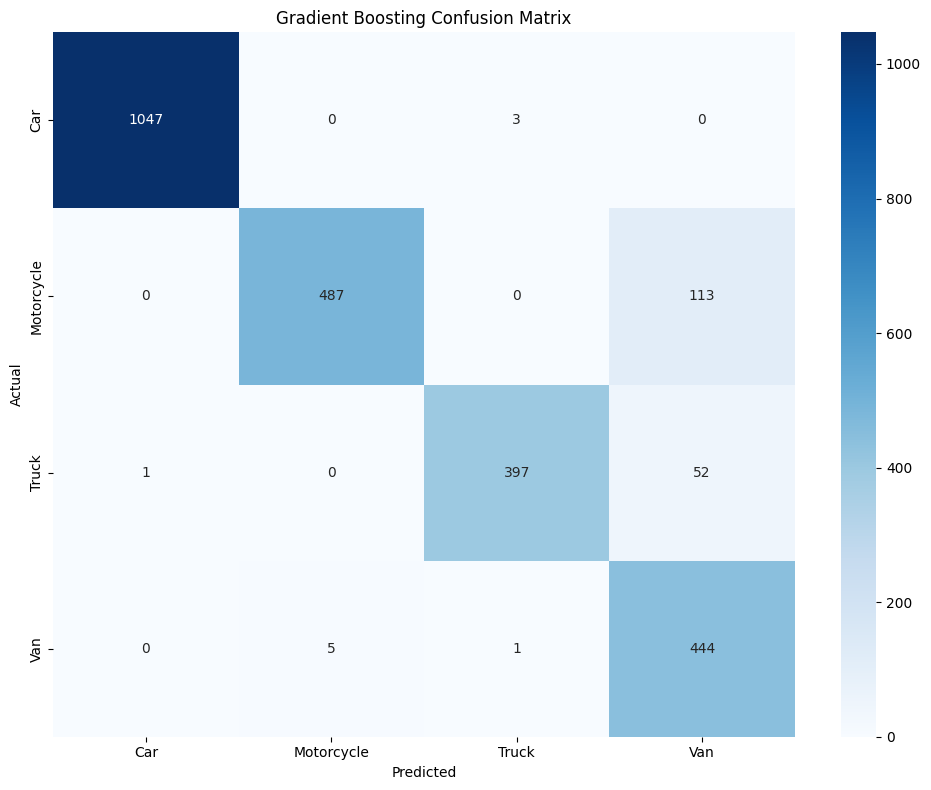


XGBoost Results:
Accuracy: 0.9302
              precision    recall  f1-score   support

         Car       1.00      1.00      1.00      1050
  Motorcycle       0.99      0.81      0.89       600
       Truck       0.97      0.89      0.93       450
         Van       0.73      0.97      0.83       450

    accuracy                           0.93      2550
   macro avg       0.92      0.92      0.91      2550
weighted avg       0.94      0.93      0.93      2550



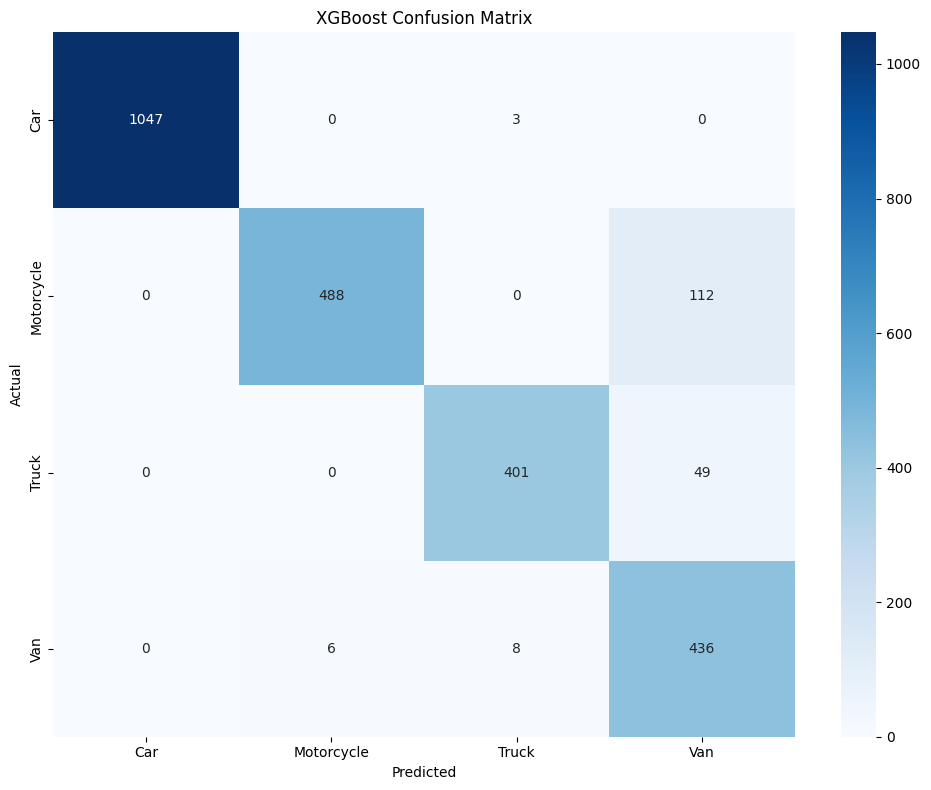


Naive Bayes Results:
Accuracy: 0.7063
              precision    recall  f1-score   support

         Car       0.86      0.98      0.92      1050
  Motorcycle       0.58      1.00      0.73       600
       Truck       0.62      0.18      0.28       450
         Van       0.50      0.20      0.29       450

    accuracy                           0.71      2550
   macro avg       0.64      0.59      0.55      2550
weighted avg       0.69      0.71      0.65      2550



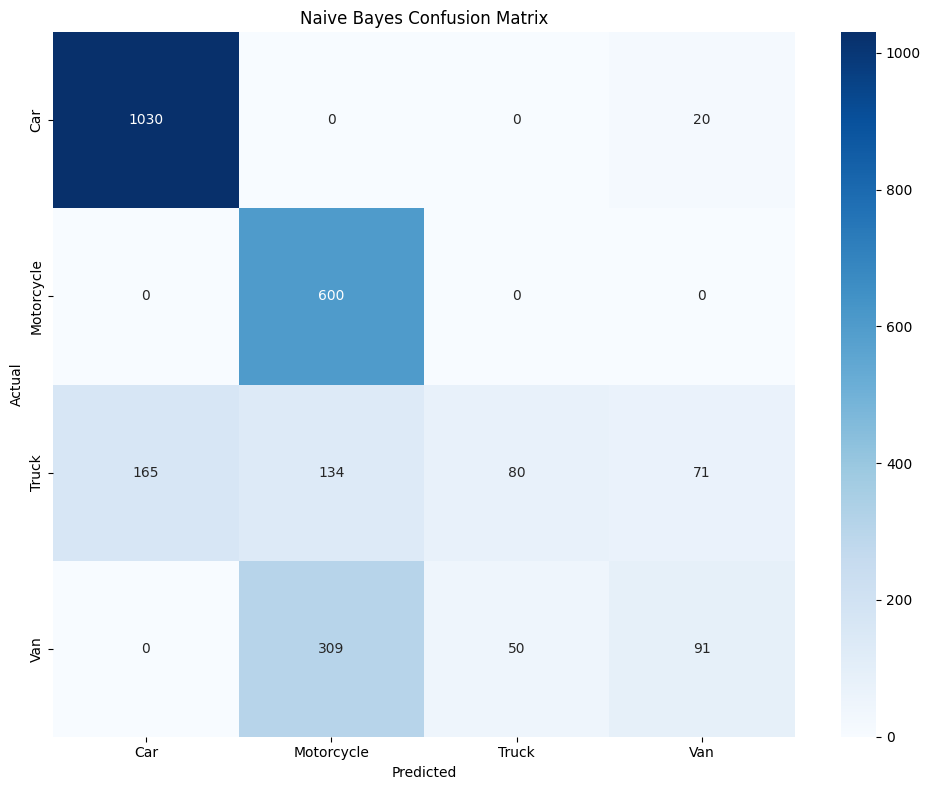

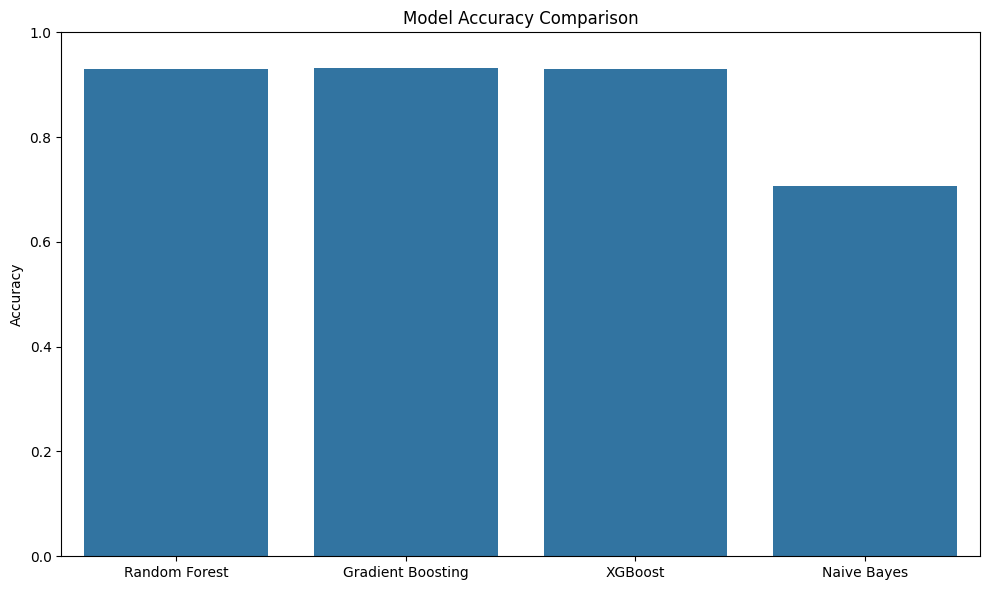

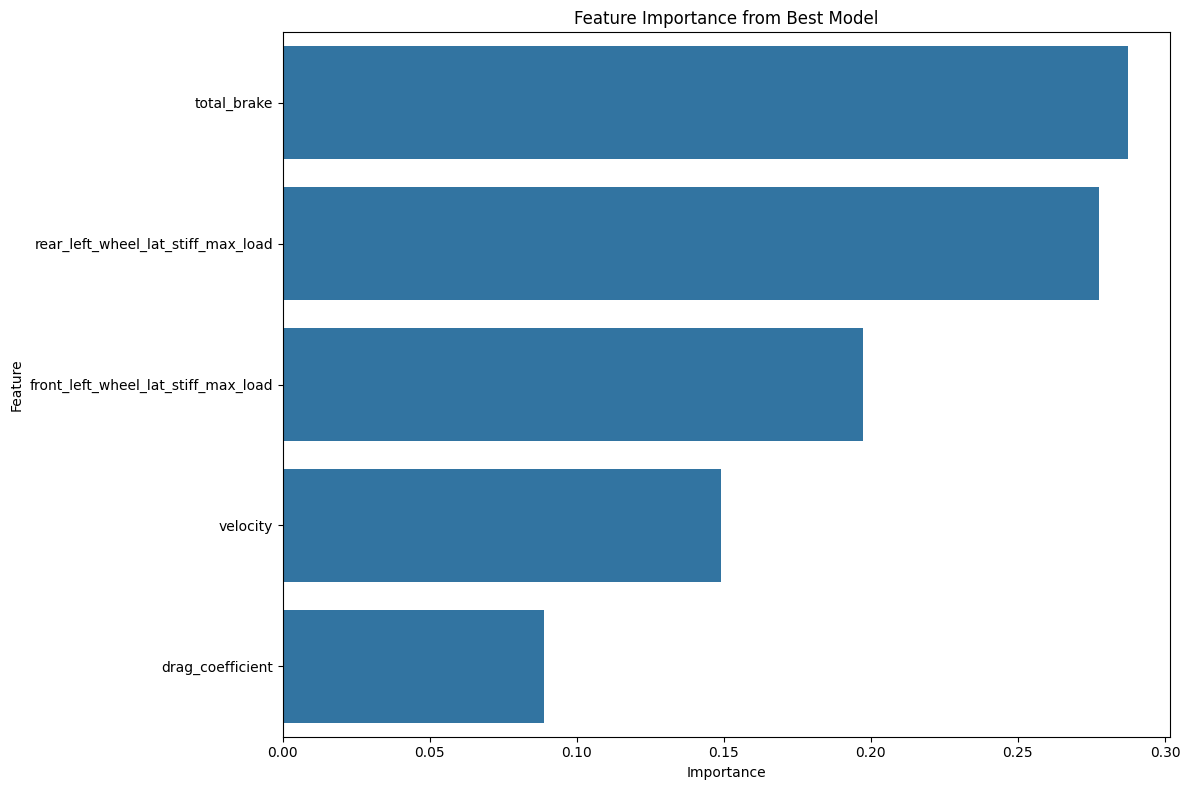

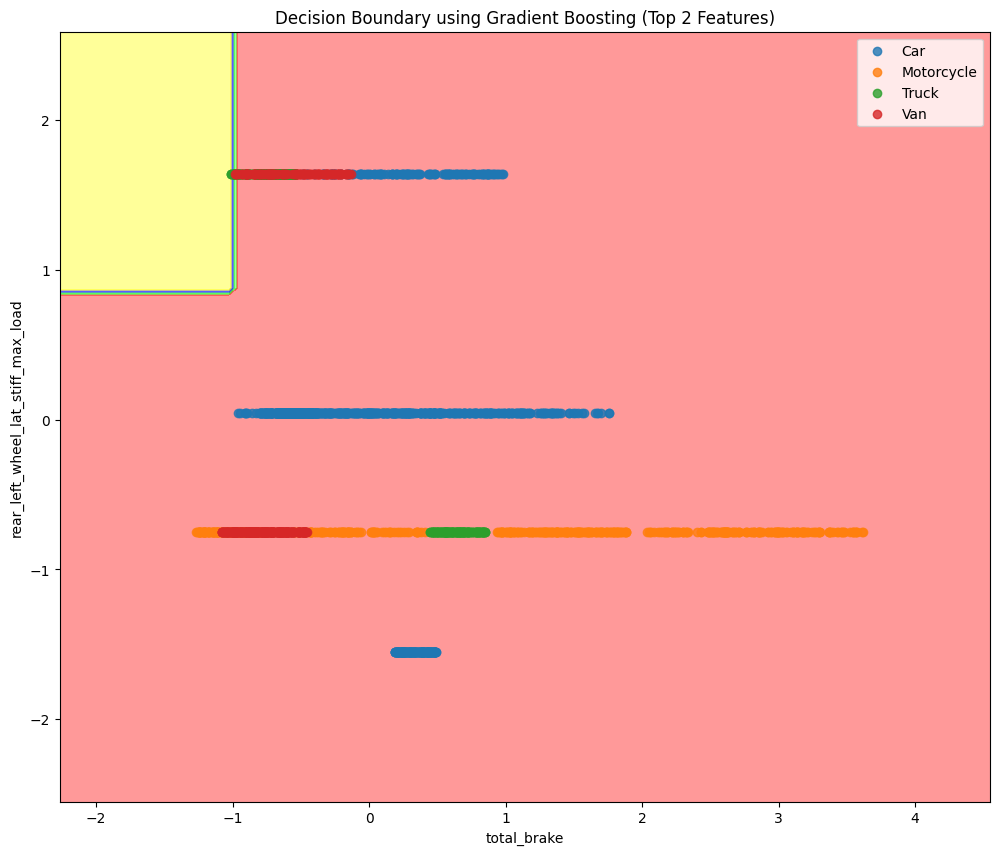

In [ ]:
# Train models with hyperparameter tuning
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGB.XGBClassifier(random_state=42, eval_metric="mlogloss"),
    "Naive Bayes": GaussianNB(),
}

# Dictionary to store the best models
best_models = {}

# Grid search parameters
param_grids = {
    "Random Forest": {
        "n_estimators": [120, 200, 300],
        "max_depth": [4,7,8,10],
        "min_samples_split": [4, 7],
    },
    "Gradient Boosting": {
        "n_estimators": [120, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [5, 7],
    },
    "XGBoost": {
        "n_estimators": [120, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [5, 7],
    },
    "Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]},
}

# Perform grid search for each model
for name, model in models.items():
    grid_search = GridSearchCV(
        model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_selected, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    best_models[name] = grid_search.best_estimator_

# Evaluate on test set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")

    # Convert numeric predictions back to original labels
    y_pred_original = le_target.inverse_transform(y_pred)
    y_test_original = le_target.inverse_transform(y_test)

    print(classification_report(y_test_original, y_pred_original))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_original, y_pred_original)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=le_target.classes_,
        yticklabels=le_target.classes_,
    )
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Compare models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Feature importance from the best model
if "Random Forest" in best_models:
    best_model = best_models["Random Forest"]
    feature_imp = pd.DataFrame(
        {"Feature": selected_features, "Importance": best_model.feature_importances_}
    ).sort_values("Importance", ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=feature_imp)
    plt.title("Feature Importance from Best Model")
    plt.tight_layout()
    plt.show()

    # Visualize the decision space (using top 2 features)
    if len(selected_features) >= 2:
        top_features = feature_imp["Feature"].iloc[:2].values
        top_feature_indices = [
            list(selected_features).index(feat) for feat in top_features
        ]

        plt.figure(figsize=(12, 10))

        from matplotlib.colors import ListedColormap

        colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF"]
        cmap = ListedColormap(colors[: len(le_target.classes_)])

        # Get the best model
        best_model_name = max(results, key=results.get)
        model = best_models[best_model_name]

        # Create a mesh grid
        X_test_top2 = X_test_selected[:, top_feature_indices]
        x_min, x_max = X_test_top2[:, 0].min() - 1, X_test_top2[:, 0].max() + 1
        y_min, y_max = X_test_top2[:, 1].min() - 1, X_test_top2[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, (x_max - x_min) / 100),
            np.arange(y_min, y_max, (y_max - y_min) / 100),
        )

        # Create an array with all zeros except for the two selected feature indices
        mesh_points = np.zeros((xx.ravel().shape[0], X_train_selected.shape[1]))
        mesh_points[:, top_feature_indices[0]] = xx.ravel()
        mesh_points[:, top_feature_indices[1]] = yy.ravel()

        # Predict on the mesh grid
        Z = model.predict(mesh_points)
        Z = Z.reshape(xx.shape)

        # Plot decision boundaries
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

        # Plot the test points
        for i, class_value in enumerate(np.unique(y_test)):
            idx = np.where(y_test == class_value)
            plt.scatter(
                X_test_selected[idx, top_feature_indices[0]],
                X_test_selected[idx, top_feature_indices[1]],
                alpha=0.8,
                label=le_target.inverse_transform([class_value])[0],
            )

        plt.xlabel(top_features[0])
        plt.ylabel(top_features[1])
        plt.title(f"Decision Boundary using {best_model_name} (Top 2 Features)")
        plt.legend()
        plt.show()

In [549]:
file_path = "./Extended_Lap_Data_Updated_unique_v5.csv"
df = pd.read_csv(file_path)

In [531]:
# # Filter unique vehicles and show counts by vehicle type
# df.groupBy("vehicle_type").count().orderBy("vehicle_type").show()

# # Show details for each unique vehicle type
# df.select('vehicle_type', 'vehicle_name', 'average_speed', 'fuel_consumption', 'mass')\
#     .dropDuplicates(['vehicle_type', 'vehicle_name'])\
#     .orderBy('vehicle_type')\
#     .show()

In [532]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Data preprocessing

In [533]:
df.describe()

,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,velocity,lap time,vehicle_name,lap,vehicle_type,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.00000,8500.000000,...,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.00000,8500.000000,8500.000000,8500.000000,8500.000000
mean,15.300034,0.007070,212.980726,47.940750,5.625210,4.561819,44.098026,8.000000,250.50000,1.117647,...,86.249518,37.411765,1294.117647,2588.235294,2.941176,18.00000,2235.294118,-829.983130,4428.750294,86.249529
std,0.570637,0.006269,50.565260,9.152733,4.022636,1.031912,1.818907,4.899268,144.34577,1.131560,...,5.988813,8.326981,694.108626,1388.217252,1.258953,1.78237,1058.885819,6294.228371,4994.571742,5.988818
min,13.603687,0.000248,120.460764,29.005589,0.534571,2.352162,38.703337,0.000000,1.00000,0.000000,...,73.714622,21.500000,400.000000,800.000000,1.000000,15.00000,1000.000000,-11518.075195,-5643.188477,73.714622
25%,14.931055,0.003310,171.702386,42.078381,2.772816,3.804269,42.696987,4.000000,125.75000,0.000000,...,84.157211,33.500000,800.000000,1600.000000,2.000000,17.00000,1000.000000,-5287.428711,1593.346680,84.157211
50%,15.441523,0.005387,192.574367,45.391252,3.915343,4.378021,43.953436,8.000000,250.50000,1.000000,...,86.128242,35.000000,1500.000000,3000.000000,3.000000,17.00000,3000.000000,-1688.020142,2868.444824,86.128242
75%,15.705991,0.007650,259.164424,53.116344,7.515535,5.171643,45.153419,12.000000,375.25000,2.000000,...,89.066559,37.500000,1500.000000,3000.000000,3.000000,20.00000,3000.000000,3398.295166,6962.188965,89.066559
max,16.862017,0.031828,302.456161,77.616349,20.134363,7.481782,49.688994,16.000000,500.00000,3.000000,...,98.503029,57.000000,3000.000000,6000.000000,5.000000,20.00000,4000.000000,10970.796875,13312.832031,98.503029


In [534]:
# Drop null values and print the count
df = df.dropna()

In [535]:
# Creating target variables
# Vehicle type classification
y_vehicle = df['vehicle_type']
# Lap time classification (Fast, Medium, Slow)
def categorize_lap_time(time):
    if time <= 42.5:
        return 'Fast'
    elif 42.5 < time <= 45:
        return 'Medium'
    else:
        return 'Slow'
    
df['lap_time_category'] = df['lap time'].apply(categorize_lap_time)
y_lap = df['lap_time_category']

In [536]:
# Splitting features and labels
X = df.drop(columns=['vehicle_type', 'lap time', 'lap_time_category'])
# X = df.drop(columns=['vehicle_type'])  # Replace 'target_column' with actual target column name
y = df['vehicle_type']  # Replace 'target_column' with actual target column name

y_lap = LabelEncoder().fit_transform(y_lap)

In [537]:
y_vehicle = df['vehicle_type']
y = LabelEncoder().fit_transform(y)

In [ ]:
# Splitting features and labels
X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_lap, X_test_lap, y_train_lap, y_test_lap = train_test_split(X, y_lap, test_size=0.3, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_vehicle)
X_test = scaler.transform(X_test_vehicle)

In [540]:
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=120, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15)
}

c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.39      0.52      1060
           1       0.13      0.30      0.18       591
           2       0.11      0.16      0.13       482
           3       0.00      0.00      0.00       417

    accuracy                           0.26      2550
   macro avg       0.26      0.21      0.21      2550
weighted avg       0.38      0.26      0.28      2550


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74      1060
           1       0.00      0.00      0.00       591
           2       0.16      0.35      0.22       482
           3       0.00      0.00      0.00       417

    accuracy                           0.31      2550
   macro avg       0.29      0.24      0.24      2550
weighted avg       0.45      0.31      0.35      2550



c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.41      0.55      1060
           1       0.13      0.29      0.18       591
           2       0.10      0.15      0.12       482
           3       0.00      0.00      0.00       417

    accuracy                           0.27      2550
   macro avg       0.26      0.21      0.21      2550
weighted avg       0.38      0.27      0.29      2550



c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.41      0.53      1060
           1       0.13      0.27      0.17       591
           2       0.09      0.13      0.11       482
           3       0.00      0.00      0.00       417

    accuracy                           0.26      2550
   macro avg       0.25      0.20      0.20      2550
weighted avg       0.36      0.26      0.28      2550



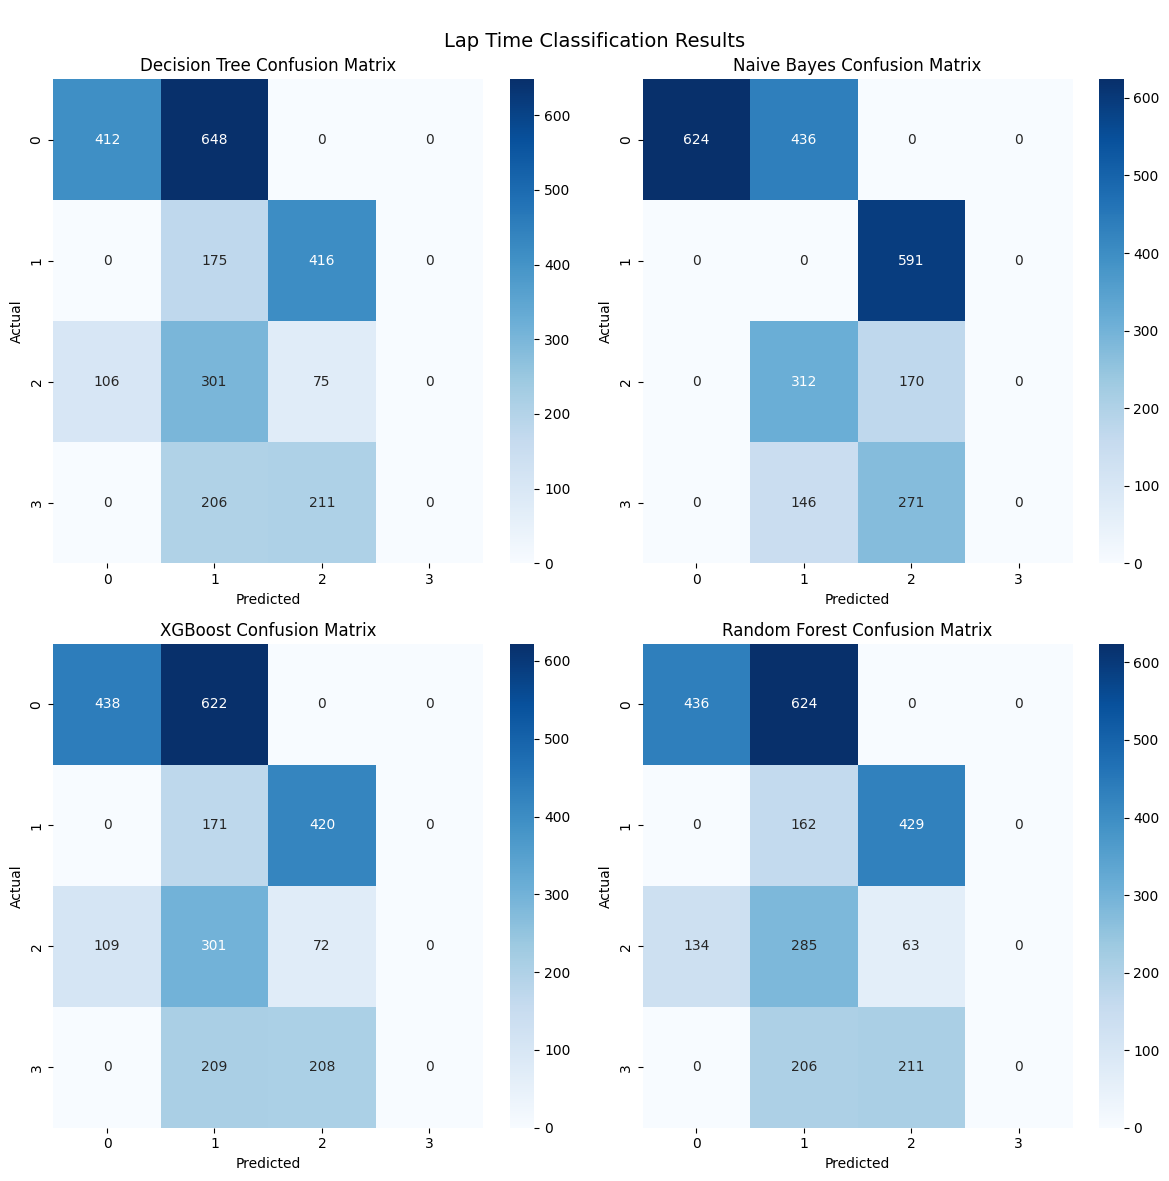

In [ ]:
# Train and evaluate models for lap ti classification

# Train and evaluate models for vehicle type classification
fifig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("\nVehicle Type Classification Results", fontsize=14)

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_vehicle, y_train_vehicle)
    y_pred = model.predict(X_test_vehicle)
    print(f'\n{name} Classification Report:\n', classification_report(y_test_vehicle, y_pred))y_pred))
    

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_lap, y_train_lap)
    y_pred = model.predict(X_test_lap)
    print(f'\n{name} Classification Report:\n', classification_report(y_test_vehicle, y_pred))
    
    # Confusion Matrix Visualization
    sns.heatmap(confusion_matrix(y_test_vehicle, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{name} Confusion Matrix')
    axes[i//2, i%2].set_xlabel('Predicted')
    axes[i//2, i%2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\roeez\source\notebooks\pytourch\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


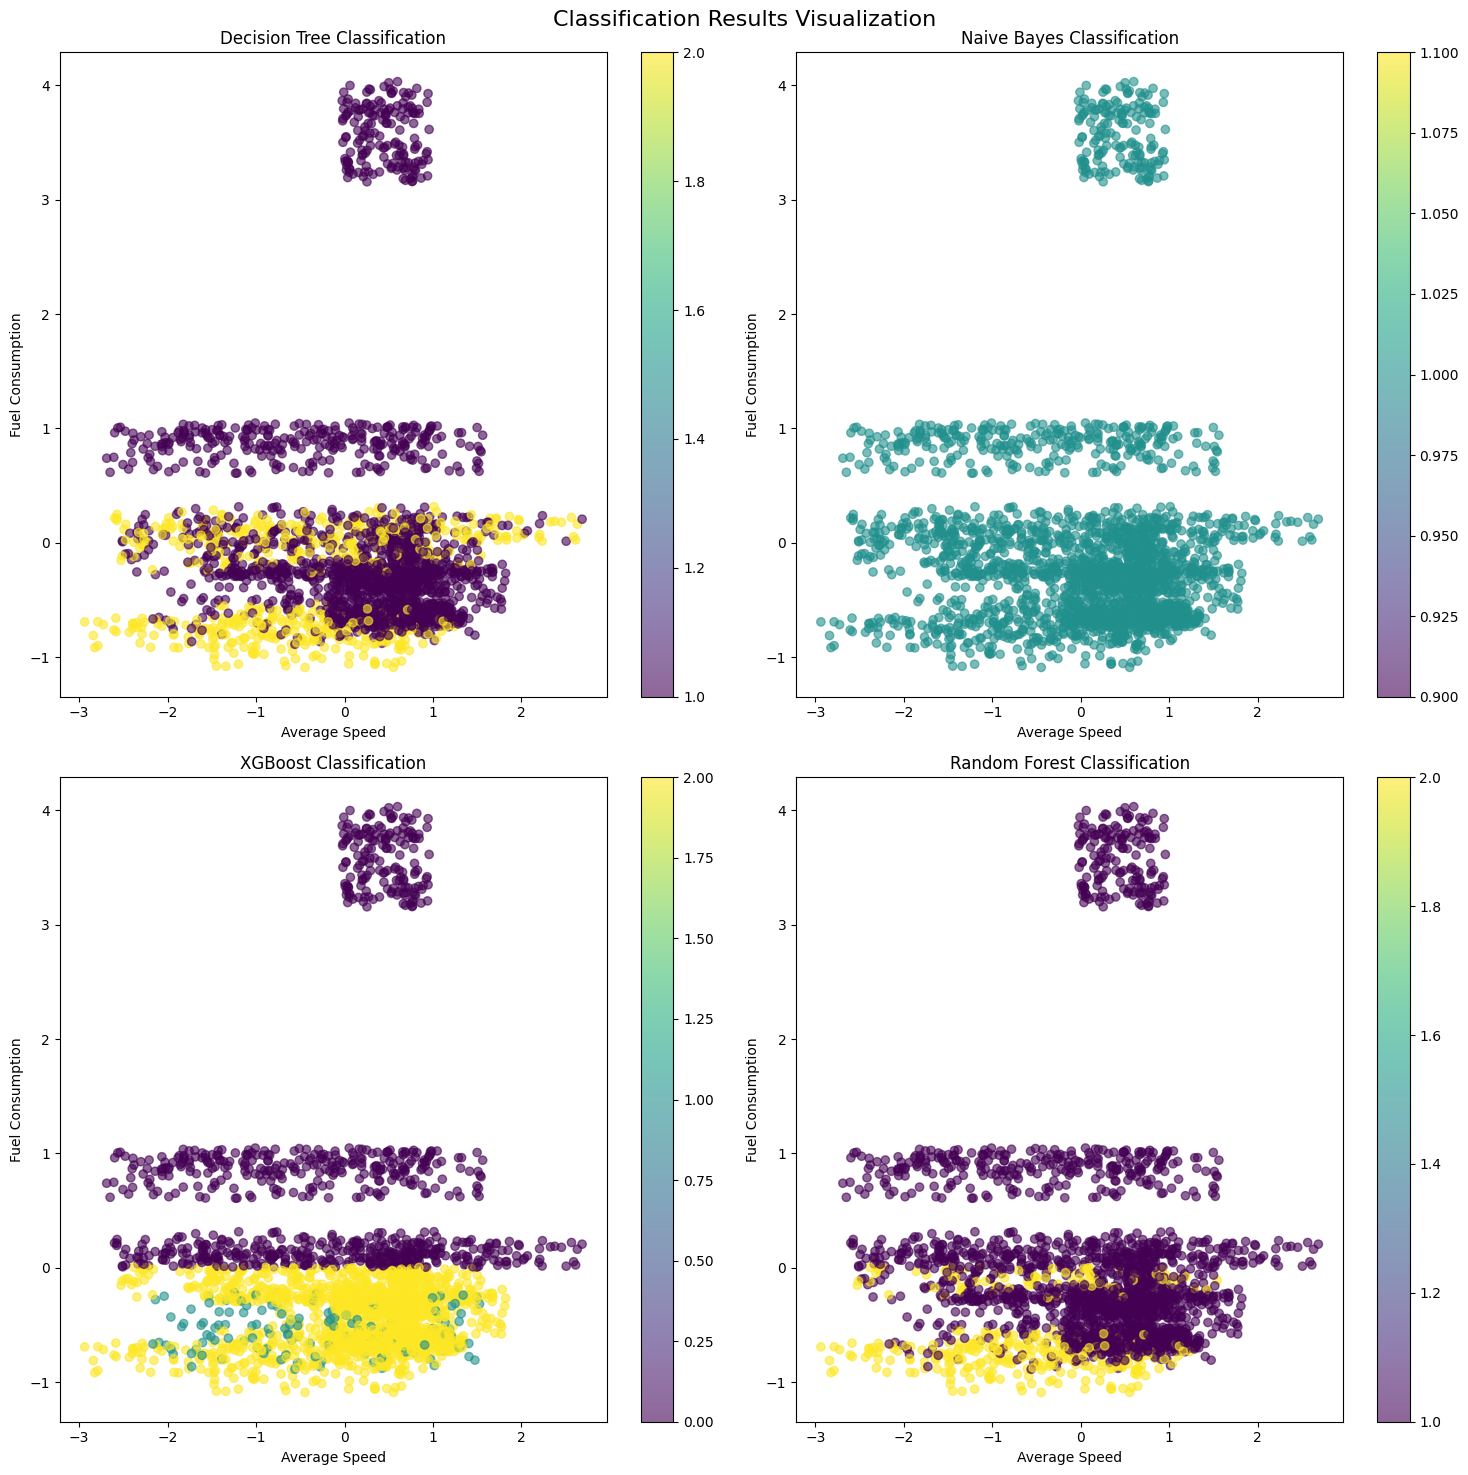

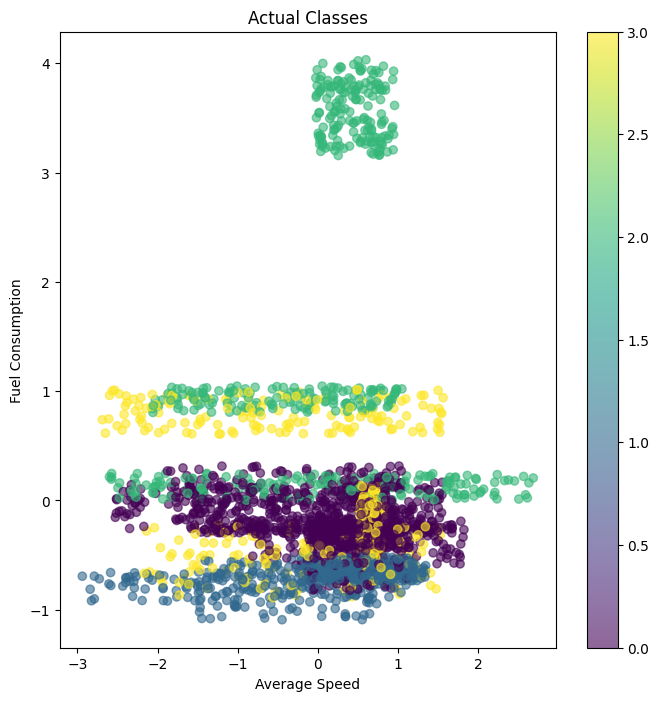

In [543]:
# Convert pandas DataFrame to numpy array for plotting
X_np = X.to_numpy()  # Convert DataFrame to numpy array
X_2d = X_np[:, [0, 1]]  # Now we can use numpy indexing

# Create a figure with subplots for each classifier
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Classification Results Visualization', fontsize=16)

# Plot for each model
for idx, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Calculate subplot position
    i, j = idx // 2, idx % 2
    
    # Create scatter plot
    scatter = axes[i,j].scatter(X_test[:, 0], X_test[:, 1], 
                               c=y_pred, 
                               cmap='viridis', 
                               alpha=0.6)
    
    # Add labels and title
    axes[i,j].set_xlabel('Average Speed')
    axes[i,j].set_ylabel('Fuel Consumption')
    axes[i,j].set_title(f'{name} Classification')
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[i,j])

plt.tight_layout()
plt.show()

# Additional plot showing actual classes for comparison
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], 
                     c=y_test_vehicle, 
                     cmap='viridis', 
                     alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('Average Speed')
plt.ylabel('Fuel Consumption')
plt.title('Actual Classes')
plt.show()

### Clustering with sklearn

In [544]:
# Import required libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

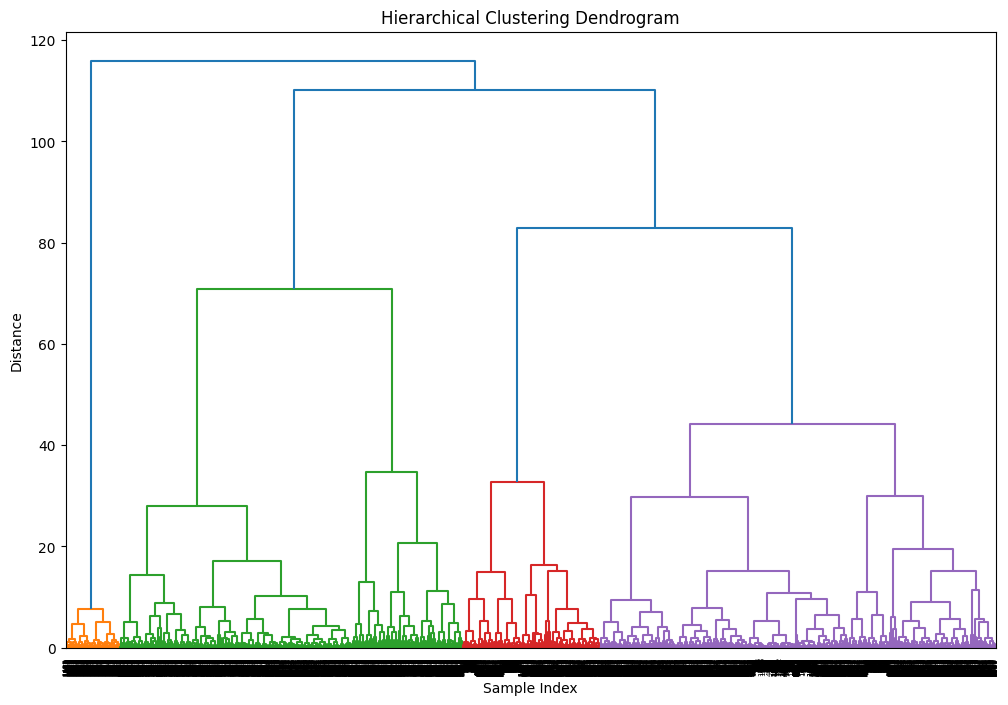

In [545]:
# Prepare features for clustering (using the same features as before)
features = ['average_speed', 'fuel_consumption', 'lap time']
X_cluster = df[features].values

# Scale the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Create linkage matrix for dendrogram
linkage_matrix = linkage(X_cluster_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

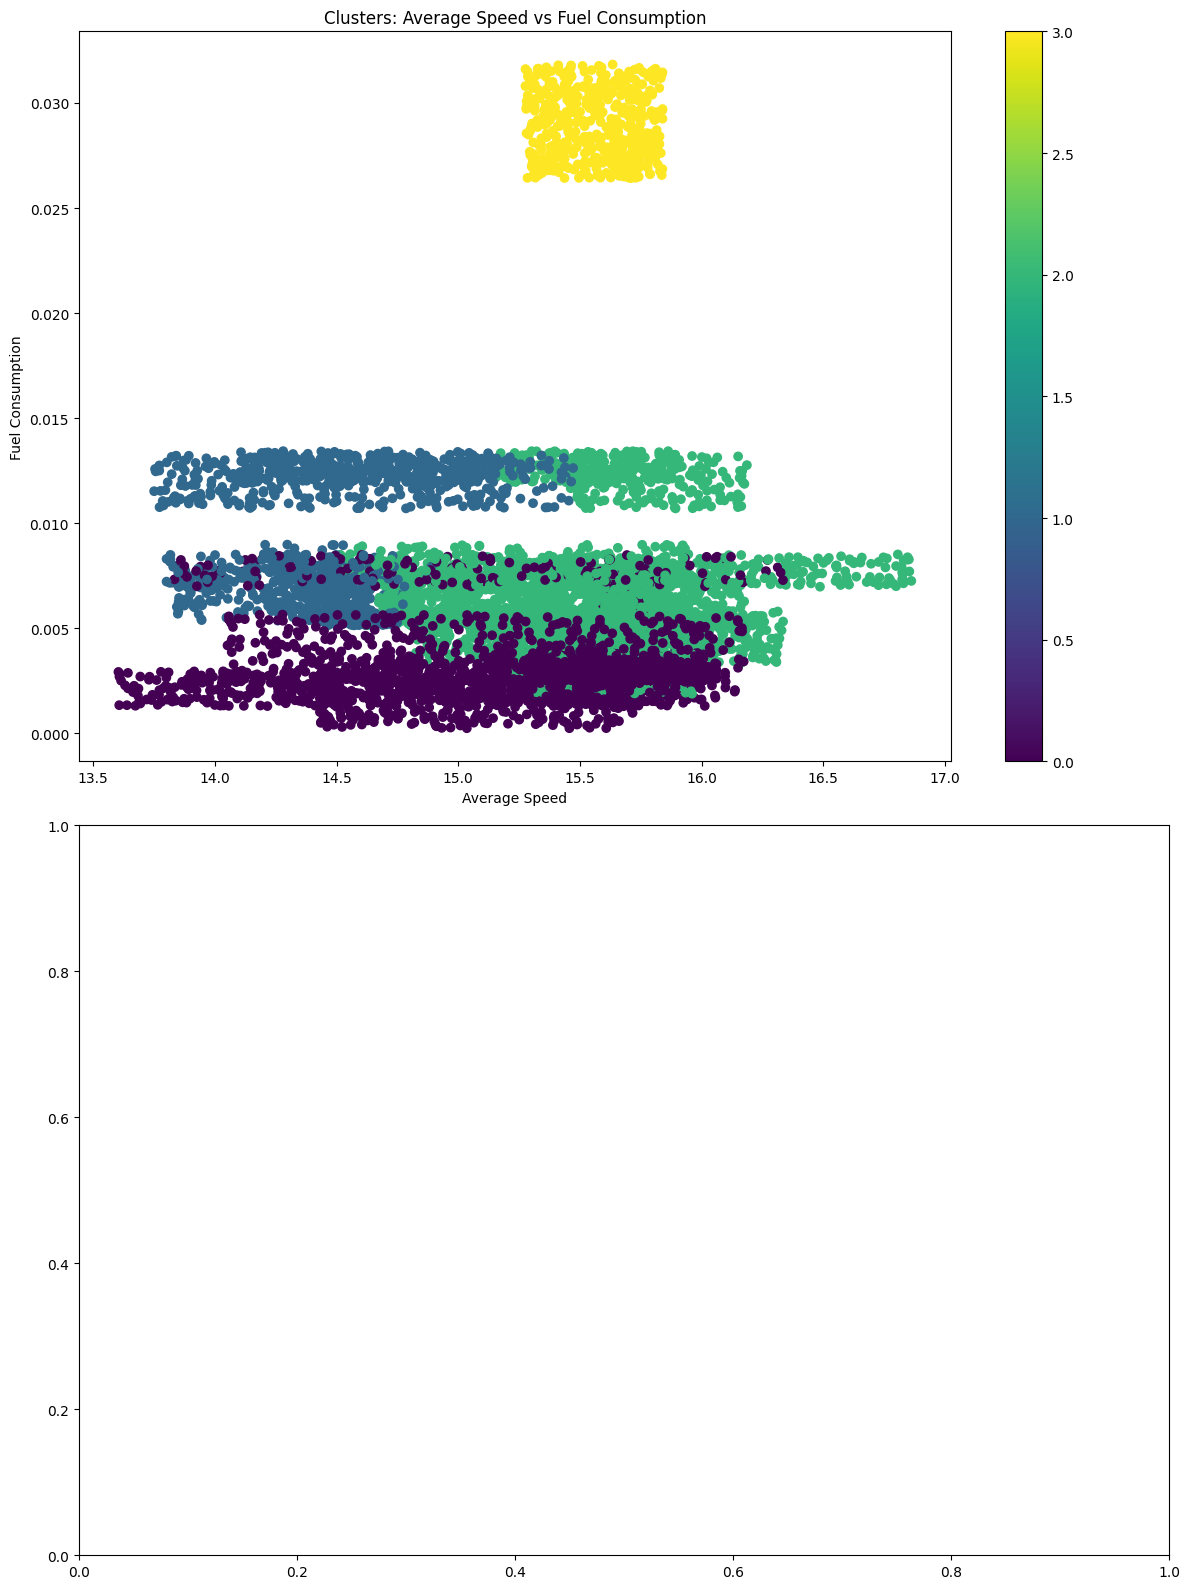

In [547]:
# Perform hierarchical clustering
n_clusters = 4  # Same as the previous BisectingKMeans
clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_cluster_scaled)

# Add cluster labels to the dataframe
df['cluster'] = cluster_labels

# Visualize clusters using scatter plots
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot average_speed vs fuel_consumption
scatter1 = axes[0].scatter(df['average_speed'], df['fuel_consumption'], 
                         c=df['cluster'], cmap='viridis')
axes[0].set_xlabel('Average Speed')
axes[0].set_ylabel('Fuel Consumption')
axes[0].set_title('Clusters: Average Speed vs Fuel Consumption')
plt.colorbar(scatter1, ax=axes[0])
plt.tight_layout()
plt.show()

In [548]:
# Print cluster statistics
print("\nCluster Statistics:")
for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Size: {len(cluster_data)}")
    print("\nMean values:")
    print(cluster_data[features].mean())
    print("\nVehicle types in cluster:")
    print(cluster_data['vehicle_type'].value_counts())


Cluster Statistics:

Cluster 0:
Size: 3132

Mean values:
average_speed       15.312440
fuel_consumption     0.003400
lap time            45.901222
dtype: float64

Vehicle types in cluster:
vehicle_type
1    2000
3    1000
2     132
Name: count, dtype: int64

Cluster 1:
Size: 1258

Mean values:
average_speed       14.485885
fuel_consumption     0.009567
lap time            43.047291
dtype: float64

Vehicle types in cluster:
vehicle_type
0    517
2    405
3    336
Name: count, dtype: int64

Cluster 2:
Size: 3610

Mean values:
average_speed       15.536944
fuel_consumption     0.006351
lap time            42.780647
dtype: float64

Vehicle types in cluster:
vehicle_type
0    2983
2     463
3     164
Name: count, dtype: int64

Cluster 3:
Size: 500

Mean values:
average_speed       15.560235
fuel_consumption     0.028973
lap time            44.957927
dtype: float64

Vehicle types in cluster:
vehicle_type
2    500
Name: count, dtype: int64


=== Clustering Evaluation Results ===


 Calinski-Harabasz Score: 4947.675
Interpretation:
→ Higher values indicate better defined clusters
→ Typical range: 50-5000
→ Current score suggests: Good separation


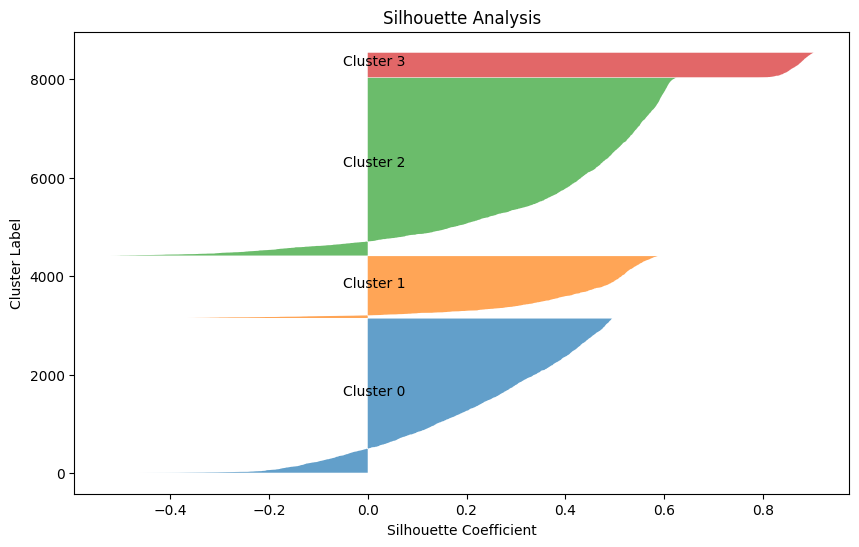

In [553]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

def evaluate_clustering_detailed(X, labels):
    """
    Comprehensive clustering evaluation with detailed interpretation
    """
    # Calculate metrics
    calinski = calinski_harabasz_score(X, labels)
    
    # Interpret results
    print("=== Clustering Evaluation Results ===\n")
    
    print("\n Calinski-Harabasz Score:", f"{calinski:.3f}")
    print("Interpretation:")
    print(f"→ Higher values indicate better defined clusters")
    print(f"→ Typical range: 50-5000")
    print(f"→ Current score suggests: {'Good' if calinski > 1000 else 'Moderate' if calinski > 200 else 'Poor'} separation")
    
    return  calinski

# Evaluate clustering results
metrics = evaluate_clustering_detailed(X_cluster_scaled, cluster_labels)

# Visualize silhouette scores for each cluster
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_cluster_scaled, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    # Get silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

plt.title("Silhouette Analysis")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
# plt.axvline(x=metrics[0], color="red", linestyle="--")
plt.show()

### PySpark Analysis of vehicle data

## **1. Install and import dependencies**

In [ ]:
!pip install pyspark


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!apt-get update
!apt-get install -y openjdk-11-jdk

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


## 2. Check PySpark env

**Check java version to make sure the installation went smoothly** 

In [ ]:
!java -version

java version "20.0.1" 2023-04-18
Java(TM) SE Runtime Environment (build 20.0.1+9-29)
Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)


In [ ]:
import pyspark
from pyspark.sql import SparkSession

# Initialize a Spark session
#spark = SparkSession.builder.appName("MLSpark").getOrCreate()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MLSpark").config("spark.driver.memory", "8g").config("spark.executor.memory", "4g").getOrCreate()
print(spark)
spark


In [ ]:
try:
    from pyspark.sql import SparkSession
    from pyspark.sql.functions import *
    from pyspark.ml import Pipeline
    from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler, Bucketizer
    from pyspark.ml.clustering import KMeans
    from pyspark.ml.classification import DecisionTreeClassifier, NaiveBayes, RandomForestClassifier
    from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator, BinaryClassificationEvaluator
    from pyspark.ml.classification import DecisionTreeClassifier, NaiveBayes, RandomForestClassifier
    from pyspark.ml.classification import GBTClassifier
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns
    import time

        
    # from pyspark.sql import SparkSession
    # from pyspark.ml import Pipeline
    # from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
    # from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
    # from pyspark.ml.clustering import BisectingKMeans
    # from pyspark.sql.functions import col, when, expr
    # from pyspark.ml.linalg import Vectors
    # import matplotlib.pyplot as plt
    # from pyspark.sql.types import StructType, StructField, StringType, DoubleType
    
    print("All PySpark libraries imported successfully!")

except ModuleNotFoundError as e:
    print(f" Import Error: {e}")


All PySpark libraries imported successfully!


## **3. Load and Explore the Dataset**

### Load the dataset into a PySpark DataFrame

In [ ]:
# Set debug parameter to avoid truncation of schema representation
spark.conf.set("spark.sql.debug.maxToStringFields", 100)
# Load dataset
# file_path = "./vehicle_big_dataset.csv"
# file_path = "./Extended_Lap_Data.csv"
# file_path = "./Extended_Lap_Data_Updated_unique.csv"

# file_path = "./Expanded_50000_noOutliers_Shuffled.csv"
# file_path = "./carla_data.xlsx"

# file_path = "./smaple_data.csv"
file_path = "./Extended_Lap_Data_Updated_unique_v5.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)  # Distributed across cluster
# Display full schema without truncation

if file_path.endswith('.xlsx'):
    # If the file is an Excel file, load it using pandas and then convert to Spark DataFrame
    df_pandas = pd.read_excel(file_path)
    df = spark.createDataFrame(df_pandas)
else:
    # If the file is a CSV file, load it directly using Spark
    df = spark.read.csv(file_path, header=True, inferSchema=True)  # Distributed across cluster

df.printSchema()


root
 |-- average_speed: double (nullable = true)
 |-- fuel_consumption: double (nullable = true)
 |-- total_steering: double (nullable = true)
 |-- total_throttle: double (nullable = true)
 |-- total_brake: double (nullable = true)
 |-- velocity: double (nullable = true)
 |-- lap time: double (nullable = true)
 |-- vehicle_name: string (nullable = true)
 |-- lap: integer (nullable = true)
 |-- vehicle_type: string (nullable = true)
 |-- mass: double (nullable = true)
 |-- drag_coefficient: double (nullable = true)
 |-- center_of_mass_x: double (nullable = true)
 |-- center_of_mass_z: double (nullable = true)
 |-- max_rpm: double (nullable = true)
 |-- clutch_strength: double (nullable = true)
 |-- gear_switch_time: double (nullable = true)
 |-- front_left_wheel_max_steer_angle: double (nullable = true)
 |-- front_left_wheel_radius: double (nullable = true)
 |-- front_left_wheel_max_brake_torque: double (nullable = true)
 |-- front_left_wheel_lat_stiff_max_load: double (nullable = true

### Show Data Schema to understand column types

### Display a Sample of the Data in a Prettier Format

In [ ]:
from pyspark.sql import functions as F

df = df.withColumn('fuel_consumption', F.col('fuel_consumption') * 100)
df_pandas = df.limit(5).toPandas()
display(df_pandas.style.set_properties(**{'text-align': 'left'}))

,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,velocity,lap time,vehicle_name,lap,vehicle_type,mass,drag_coefficient,center_of_mass_x,center_of_mass_z,max_rpm,clutch_strength,gear_switch_time,front_left_wheel_max_steer_angle,front_left_wheel_radius,front_left_wheel_max_brake_torque,front_left_wheel_lat_stiff_max_load,front_left_wheel_lat_stiff_value,front_left_wheel_long_stiff_value,front_left_wheel_position_x,front_left_wheel_position_y,front_left_wheel_position_z,front_right_wheel_max_steer_angle,front_right_wheel_radius,front_right_wheel_max_brake_torque,front_right_wheel_lat_stiff_max_load,front_right_wheel_lat_stiff_value,front_right_wheel_long_stiff_value,front_right_wheel_position_x,front_right_wheel_position_y,front_right_wheel_position_z,rear_left_wheel_radius,rear_left_wheel_max_brake_torque,rear_left_wheel_max_handbrake_torque,rear_left_wheel_lat_stiff_max_load,rear_left_wheel_lat_stiff_value,rear_left_wheel_long_stiff_value,rear_left_wheel_position_x,rear_left_wheel_position_y,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,15.670213,0.488613,168.013220,41.177921,3.345929,4.450584,42.023197,vehicle.audi.tt,1,Car,1265.000000,0.250000,0.500000,-0.250000,4700.000000,10.000000,0.100000,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9982.957031,4338.941895,87.377563,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9831.060547,4337.905762,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9978.859375,4074.701416,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9838.762695,4073.746094,87.377563
1,15.601593,0.467878,170.399465,37.822685,6.624914,4.622826,42.000449,vehicle.audi.tt,2,Car,1265.000000,0.250000,0.500000,-0.250000,4700.000000,10.000000,0.100000,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9982.957031,4338.941895,87.377563,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9831.060547,4337.905762,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9978.859375,4074.701416,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9838.762695,4073.746094,87.377563
2,15.485363,0.489195,173.073007,37.987570,3.902746,3.564281,42.057393,vehicle.audi.tt,3,Car,1265.000000,0.250000,0.500000,-0.250000,4700.000000,10.000000,0.100000,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9982.957031,4338.941895,87.377563,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9831.060547,4337.905762,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9978.859375,4074.701416,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9838.762695,4073.746094,87.377563
3,15.789362,0.467051,169.156264,38.547860,7.682187,4.315097,41.935543,vehicle.audi.tt,4,Car,1265.000000,0.250000,0.500000,-0.250000,4700.000000,10.000000,0.100000,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9982.957031,4338.941895,87.377563,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9831.060547,4337.905762,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9978.859375,4074.701416,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9838.762695,4073.746094,87.377563
4,15.792036,0.482587,170.409213,37.230459,3.392884,3.572567,41.955492,vehicle.audi.tt,5,Car,1265.000000,0.250000,0.500000,-0.250000,4700.000000,10.000000,0.100000,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9982.957031,4338.941895,87.377563,69.999992,34.000000,700.000000,3.000000,20.000000,3000.000000,9831.060547,4337.905762,87.377563,34.000000,700.000000,1400.000000,3.000000,20.000000,3000.000000,9978.859375,4074.701416,87.377563,34

In [ ]:
df.describe().show()

+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+--------------------------------+-----------------------+---------------------------------+-----------------------------------+--------------------------------+---------------------------------+---------------------------+---------------------------+---------------------------+---------------------------------+------------------------+----------------------------------+------------------------------------+---------------------------------+----------------------------------+----------------------------+----------------------------+----------------------------+----------------------+--------------------------------+------------------------------------+--------------

In [ ]:
df = df.na.drop()
df.head()

Row(average_speed=15.67021296596129, fuel_consumption=0.48861327727572995, total_steering=168.0132198046866, total_throttle=41.17792122138479, total_brake=3.345928646031358, velocity=4.450584397614042, lap time=42.02319717451219, vehicle_name='vehicle.audi.tt', lap=1, vehicle_type='Car', mass=1265.0, drag_coefficient=0.25, center_of_mass_x=0.5, center_of_mass_z=-0.25, max_rpm=4700.0, clutch_strength=10.0, gear_switch_time=0.1000000014901161, front_left_wheel_max_steer_angle=69.99999237060547, front_left_wheel_radius=34.0, front_left_wheel_max_brake_torque=700.0, front_left_wheel_lat_stiff_max_load=3.0, front_left_wheel_lat_stiff_value=20.0, front_left_wheel_long_stiff_value=3000.0, front_left_wheel_position_x=9982.95703125, front_left_wheel_position_y=4338.94189453125, front_left_wheel_position_z=87.3775634765625, front_right_wheel_max_steer_angle=69.99999237060547, front_right_wheel_radius=34.0, front_right_wheel_max_brake_torque=700.0, front_right_wheel_lat_stiff_max_load=3.0, front_

In [ ]:
df.select([
    'vehicle_type','vehicle_name','fuel_consumption', 'average_speed' ]).show(6)

print(f"Number of records: {df.count()}")
print(f"Number of features: {len(df.columns)}")


+------------+---------------+-------------------+-----------------+
|vehicle_type|   vehicle_name|   fuel_consumption|    average_speed|
+------------+---------------+-------------------+-----------------+
|         Car|vehicle.audi.tt|0.48861327727572995|15.67021296596129|
|         Car|vehicle.audi.tt|0.46787798591469004| 15.6015933208139|
|         Car|vehicle.audi.tt|   0.48919497114551|15.48536332606623|
|         Car|vehicle.audi.tt|0.46705115052031004|15.78936192330436|
|         Car|vehicle.audi.tt|    0.4825874171538|15.79203625849889|
|         Car|vehicle.audi.tt|0.45358594301676997|15.79285541572513|
+------------+---------------+-------------------+-----------------+
only showing top 6 rows

Number of records: 8500
Number of features: 53


## **4. Data Preprocessing**

##### Cleaning the data and removing ourlier

In [ ]:
# from pyspark.sql import functions as F
# from pyspark.sql.window import Window

In [ ]:
# # from pyspark.sql import functions as F
# # from pyspark.sql.types import *

# def clean_and_validate_data(df):
#     """
#     Clean and validate the vehicle performance dataset
#     """
#     # Make column names consistent
#     df = df.select([F.col(c).alias(c.lower().replace(' ', '_')) for c in df.columns])
    
#     # Remove duplicates
#     df = df.dropDuplicates()
    
#     # Handle nulls
#     df = df.dropna(subset=['vehicle_type', 'vehicle_name', 'track_type'])
    
#     # Convert data types
#     df = df.withColumn('fuel_consumption', F.col('fuel_consumption').cast(FloatType()))
#     df = df.withColumn('average_speed', F.col('average_speed').cast(FloatType()))
    
#     # Filter invalid values
#     df = df.filter(F.col('fuel_consumption') > 0)
#     df = df.filter(F.col('average_speed') > 0)
    
#     return df

In [ ]:
# # Clean the data
# df_cleaned = clean_and_validate_data(df)
# df_cleaned.describe().show()
# # Generate report
# # print_data_quality_report(df, df_cleaned)

# # Show sample of cleaned data
# df_cleaned.select([
#     'vehicle_type', 'vehicle_name', 'fuel_consumption', 
#     'average_speed', 'track_type'
# ]).show(6)

# # print(f"Number of records after cleaning: {df_cleaned.count()}")
# # print(f"Number of features: {len(df_cleaned.columns)}")

In [ ]:
# print("\n--- Data Preprocessing ---")

# # Check for missing values
# print("Missing Values Summary:")
# for col_name in df.columns:
#     null_count = df.filter(col(col_name).isNull()).count()
#     if null_count > 0:
#         print(f"{col_name}: {null_count} null values")
        
# print("\nNumerical Features Statistics:")
# df.describe().show()

categorical

#### Feature engineering

In [ ]:
# # VectorAssembler to combine all features into a single vector
# assembler = VectorAssembler(inputCols=features, outputCol="features", handleInvalid="keep")

# median_speed = df.approxQuantile("average_speed", [0.5], 0.01)[0]
# print(f"Median speed: {median_speed}")

# # label is average speed greater then median speed.
# df = df.withColumn("label", when(col("average_speed") > median_speed, 1.0).otherwise(0.0))

# print("\nClass Distribution for Binary Classification:")
# df.groupBy("label").count().show()


In [ ]:
# Add multi-class label based on vehicle_type for multi-class classification
# We'll use this for Naive Bayes and other multi-class examples
indexer = StringIndexer(inputCol="vehicle_type", outputCol="vehicle_type_class", handleInvalid="keep")
df = indexer.fit(df).transform(df)

print("\nVehicle Type to Class Mapping:")
df.select("vehicle_type", "vehicle_type_class").distinct().show()


Vehicle Type to Class Mapping:
+------------+------------------+
|vehicle_type|vehicle_type_class|
+------------+------------------+
|         Car|               0.0|
|  Motorcycle|               1.0|
|       Truck|               2.0|
|         Van|               3.0|
+------------+------------------+



In [ ]:
# # Split the data into training and test sets
# train_df, test_df = df.randomSplit([0.7, 0.3], seed=42)
# print(f"Training set size: {train_df.count()}")
# print(f"Test set size: {test_df.count()}")

# # Create a Pipeline for consistent preprocessing
# preprocessing_pipeline = Pipeline(stages=indexers + encoders + [assembler])

# # Apply preprocessing pipeline to datasets
# preprocessing_model = preprocessing_pipeline.fit(train_df)
# train_data = preprocessing_model.transform(train_df)
# test_data = preprocessing_model.transform(test_df)

# print("\nPreprocessed data sample:")
# train_data.select("features", "label").show(5, truncate=True)

## Model building and evaluation

In [ ]:
# Define a function to evaluate classification models
def evaluate_model(predictions, label_col="label", prediction_col="prediction"):
    """
    Evaluate a classification model using various metrics
    """
    # For multi-class metrics
    evaluator = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col)
    
    # Calculate metrics
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    
    # For binary metrics
    # If we have binary classification, calculate AUC
    binaryEvaluator = BinaryClassificationEvaluator(labelCol=label_col, rawPredictionCol="rawPrediction")
    
    try:
        auc = binaryEvaluator.evaluate(predictions, {binaryEvaluator.metricName: "areaUnderROC"})
        auc_pr = binaryEvaluator.evaluate(predictions, {binaryEvaluator.metricName: "areaUnderPR"})
    except:
        # For multi-class, these might not be available
        auc = None
        auc_pr = None
    
    # Calculate confusion matrix
    # Convert to Pandas for easier manipulation
    pd_predictions = predictions.select(label_col, prediction_col).toPandas()
    
    # Get unique classes
    classes = sorted(pd_predictions[label_col].unique())
    
    # Initialize confusion matrix
    cm = np.zeros((len(classes), len(classes)))
    
    # Fill confusion matrix
    for i in range(len(classes)):
        for j in range(len(classes)):
            cm[i, j] = ((pd_predictions[label_col] == classes[i]) & 
                         (pd_predictions[prediction_col] == classes[j])).sum()
    
    # For binary classification, extract TP, FP, TN, FN
    if len(classes) == 2:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = None, None, None, None
    
    # Return all metrics
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "auc_pr": auc_pr,
        "confusion_matrix": cm,
        "TP": tp,
        "FP": fp,
        "TN": tn,
        "FN": fn
    }

In [ ]:
# Function to display evaluation results
def display_evaluation(model_name, metrics):
    """Display evaluation metrics in a formatted way"""
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    
    if metrics['auc'] is not None:
        print(f"AUC-ROC: {metrics['auc']:.4f}")
        print(f"AUC-PR: {metrics['auc_pr']:.4f}")
    
    if metrics['TP'] is not None:
        print("\nConfusion Matrix:")
        print(f"TP: {metrics['TP']}, FP: {metrics['FP']}")
        print(f"FN: {metrics['FN']}, TN: {metrics['TN']}")
    else:
        print("\nConfusion Matrix:")
        print(metrics['confusion_matrix'])

### Decision tree classifier

In [ ]:
# # Train the model
# start_time = time.time()
# dt_model = dt.fit(train_data)
# dt_training_time = time.time() - start_time

# # Make predictions
# dt_predictions = dt_model.transform(test_data)

# # Evaluate the model
# dt_metrics = evaluate_model(dt_predictions)
# display_evaluation("Decision Tree", dt_metrics)

In [ ]:
# # ------ 2. Naive Bayes Classifier ------

# print("\n\n=== Naive Bayes Classifier ===")

# # For Naive Bayes, we need to ensure features are non-negative
# # We'll create a simplified feature vector with only numerical features

# # Create specific pipeline for Naive Bayes
# nb_assembler = VectorAssembler(
#     inputCols=["average_speed", "fuel_consumption", "velocity", "lap_time"], 
#     outputCol="nb_features", 
#     handleInvalid="keep"
# )



## **5. Clustering Using KMeans**

### Select Features for Clustering

### Convert Categorical Labels to Numeric

In [ ]:
# from pyspark.ml.feature import OneHotEncoder

# # Convert vehicle_type to numeric
# vehicle_indexer = StringIndexer(inputCol="vehicle_type", outputCol="vehicle_type_index")
# df = vehicle_indexer.fit(df).transform(df)

# # Convert track_type to numeric
# track_indexer = StringIndexer(inputCol="track_type", outputCol="track_type_index")
# df = track_indexer.fit(df).transform(df)

# # Convert vehicle_name to numeric
# vehicle_name_indexer = StringIndexer(inputCol="vehicle_name", outputCol="vehicle_name_index")
# df = vehicle_name_indexer.fit(df).transform(df)

# # Apply OneHotEncoder to the indexed columns
# encoder = OneHotEncoder(inputCols=["vehicle_type_index", "track_type_index", "vehicle_name_index"],
#                         outputCols=["vehicle_type_onehot", "track_type_onehot", "vehicle_name_onehot"])
# df = encoder.fit(df).transform(df)

# # Display the transformed DataFrame
# df.select("vehicle_type", "track_type", "vehicle_name", "vehicle_type_onehot", "track_type_onehot", "vehicle_name_onehot").show(5)

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Define StringIndexer for categorical features
vehicle_indexer = StringIndexer(inputCol="vehicle_type", outputCol="vehicle_type_index", handleInvalid="keep")
track_indexer = StringIndexer(inputCol="track_type", outputCol="track_type_index", handleInvalid="keep")
vehicle_name_indexer = StringIndexer(inputCol="vehicle_name", outputCol="vehicle_name_index", handleInvalid="keep")

# Define OneHotEncoder
encoder = OneHotEncoder(
    inputCols=["vehicle_type_index", "track_type_index", "vehicle_name_index"],
    outputCols=["vehicle_type_onehot", "track_type_onehot", "vehicle_name_onehot"],
    dropLast=False  # Keep all categories
)




In [ ]:
# #### no pipeline for clustering
# # Create a Pipeline to avoid repeated transformations
# pipeline = Pipeline(stages=[vehicle_indexer, track_indexer, vehicle_name_indexer, encoder])

# # Fit and transform the DataFrame
# df_transformed = pipeline.fit(df).transform(df)

# # Display the transformed DataFrame
# df_transformed.select("vehicle_type", "track_type", "vehicle_name", 
#                       "vehicle_type_onehot", "track_type_onehot", "vehicle_name_onehot").show(5)

In [ ]:

# Drop original categorical columns
#df = df.drop("vehicle_type", "track_difficulty")

# Assemble features
# features = ["vehicle_type_index", "fuel_consumption", "velocity", "total_throttle", "total_brake", "total_steering"]

# df_easy_tracks = df.filter(col("track_type") == "easy")

###################### before the change ##########################
#features = ["imu_accel_x", "imu_accel_y", "imu_accel_z", "velocity_kph", "throttle", "brake", "steering"]


`VectorAssembler` combines these individual feature columns into a single "features" column, which is required for machine learning models in PySpark.
`assembler.transform(df)` applies this transformation, adding a new column features to our dataset.

In [ ]:

features = ["average_speed", "fuel_consumption", "lap time"]
assembler_numeric = VectorAssembler(inputCols=features, outputCol="features")

scaler = StandardScaler(inputCol="features_numeric", outputCol="features_scaled")

input_cols = ["vehicle_type_onehot", "track_type_onehot", "vehicle_name_onehot", "avg_speed", "fuel_consumption", "lap time"]

assembler_full = VectorAssembler(inputCols=input_cols, outputCol="features")

# df_cluster = assembler.transform(df_easy_tracks)  # Apply transformation to df 

df_cluster = assembler_numeric.transform(df)  # Apply transformation to df 

df_cluster.select("features").show(5, truncate=False)  # Debugging step - making sure feature columns created succesfully

+---------------------------------------------------------+
|features                                                 |
+---------------------------------------------------------+
|[15.67021296596129,0.48861327727572995,42.02319717451219]|
|[15.6015933208139,0.46787798591469004,42.00044864157726] |
|[15.48536332606623,0.48919497114551,42.05739321912051]   |
|[15.78936192330436,0.46705115052031004,41.93554325469784]|
|[15.79203625849889,0.4825874171538,41.95549203455207]    |
+---------------------------------------------------------+
only showing top 5 rows



### Apply KMeans Clustering

In [ ]:
# kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="cluster")
# model = kmeans.fit(df_cluster)
# clustered_data = model.transform(df_cluster)

from pyspark.ml.clustering import BisectingKMeans

# Initialize Bisecting K-means
bkm = BisectingKMeans(k=4, featuresCol="features")

# Fit the model
model = bkm.fit(df_cluster)

# Make predictions
clustered_data = model.transform(df_cluster)

# Show results

- `k=4` means we want to create 3 clusters.
- `featuresCol="features"` tells PySpark that we are using the features column created earlier.
- `predictionCol="cluster"` adds a new column "cluster", which contains the assigned cluster number for each row.
- `model = kmeans.fit(df_cluster)` trains the KMeans model using our dataset.
- `clustered_data = model.transform(df_cluster)` assigns each data point to a cluster.

### Show Cluster Assignments


In [ ]:
clustered_data.select("features","vehicle_name","vehicle_type" ,"lap time","prediction").show(5)

# clustered_data.select("features","vehicle_name","vehicle_type" ,"clustered","lap time").show(10)

+--------------------+---------------+------------+-----------------+----------+
|            features|   vehicle_name|vehicle_type|         lap time|prediction|
+--------------------+---------------+------------+-----------------+----------+
|[15.6702129659612...|vehicle.audi.tt|         Car|42.02319717451219|         0|
|[15.6015933208139...|vehicle.audi.tt|         Car|42.00044864157726|         0|
|[15.4853633260662...|vehicle.audi.tt|         Car|42.05739321912051|         0|
|[15.7893619233043...|vehicle.audi.tt|         Car|41.93554325469784|         0|
|[15.7920362584988...|vehicle.audi.tt|         Car|41.95549203455207|         0|
+--------------------+---------------+------------+-----------------+----------+
only showing top 5 rows



In [ ]:
clustered_data.select("features","vehicle_name", "vehicle_type", "prediction", "lap time").where(clustered_data.prediction == 2).show(5)

+--------------------+--------------------+------------+----------+-----------------+
|            features|        vehicle_name|vehicle_type|prediction|         lap time|
+--------------------+--------------------+------------+----------+-----------------+
|[14.4339359912678...|vehicle.carlamoto...|       Truck|         2|44.59413662635953|
|[15.0338086567840...|vehicle.carlamoto...|       Truck|         2| 44.6575683990185|
|[14.7485897299238...|vehicle.carlamoto...|       Truck|         2|44.67753564038888|
|[15.4913585316313...|vehicle.carlamoto...|       Truck|         2| 44.4438463229247|
|[15.7101170893452...|vehicle.carlamoto...|       Truck|         2|44.41902404508023|
+--------------------+--------------------+------------+----------+-----------------+
only showing top 5 rows



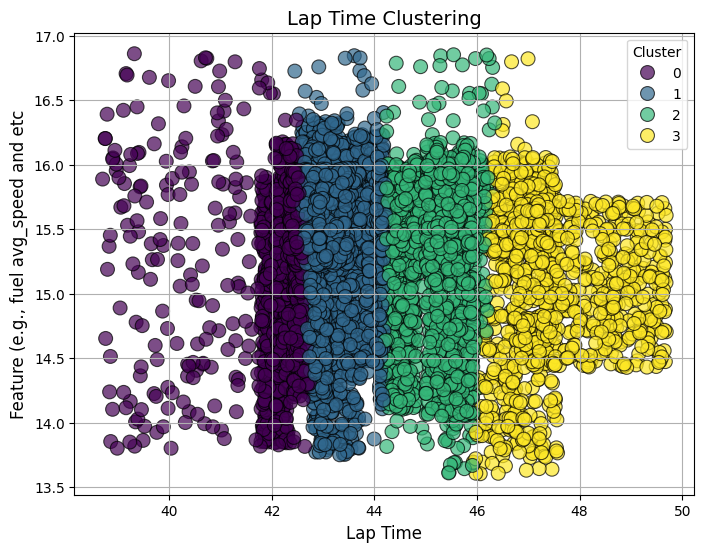

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert clustered PySpark DataFrame to Pandas
clustered_data_pd = clustered_data.select("features","lap time", "prediction").toPandas()


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustered_data_pd["lap time"], 
    y=clustered_data_pd["features"].apply(lambda x: x[0]),  # Example: Extracting first feature
    hue=clustered_data_pd["prediction"], 
    palette="viridis", 
    s=100, 
    alpha=0.7, 
    edgecolor="black"
)

plt.title("Lap Time Clustering", fontsize=14)
plt.xlabel("Lap Time", fontsize=12)
plt.ylabel("Feature (e.g., fuel avg_speed and etc", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.show()


## **6. Classification Using Decision Tree and Random Forest**


`vectorAssembler`  is a vector of the feature we want to group toghether to give a prediction.

track_difficulty is a categorical column (`Easy`, `Medium`, `Hard`).
`StringIndexer` converts it into a numeric column (`label`):
`Easy → 0`, `Medium → 1`, `Hard → 2`
This is necessary because machine learning models in PySpark only work with numbers, not text.

In [ ]:
# # Ensure df_class has a 'features' column like df_cluster
# # features = ["vehicle_type_index", "difficulty_index", "fuel_consumed_liters", "velocity_kph", "track_completion_time"]
# #features = ["imu_accel_x", "imu_accel_y", "imu_accel_z", "velocity_kph", "throttle", "brake", "steering"]



# ############# turn off to checkdata
# # features = ["average_speed","fuel_consumption","total_steering","total_throttle","total_brake"	
# #             ,"vehicle_type","track_type"]
# # Assemble Feature Vector

# assembler = VectorAssembler(
#     inputCols=["vehicle_type_index", "track_type_index", "avg_speed", "lap time"],  # adjust columns based on your data
#     outputCol="features"
# )
# pipeline = Pipeline(stages=[vehicle_indexer, track_indexer, assembler])

# df_transformed = pipeline.fit(df).transform(df)

# # assembler = VectorAssembler(inputCols=features, outputCol="features")

# df_class = assembler.transform(df)  # Ensure df_class is defined properly

# # Convert categorical labels into numeric form
# # indexer = StringIndexer(inputCol="lap_time", outputCol="label")
# # df_class = indexer.fit(df_class).transform(df_class)

In [ ]:
df.show(5)

+-----------------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+---------------+---+------------+------+----------------+----------------+----------------+-------+---------------+------------------+--------------------------------+-----------------------+---------------------------------+-----------------------------------+--------------------------------+---------------------------------+---------------------------+---------------------------+---------------------------+---------------------------------+------------------------+----------------------------------+------------------------------------+---------------------------------+----------------------------------+----------------------------+----------------------------+----------------------------+----------------------+--------------------------------+------------------------------------+----------------------------------+-------------------------------+------------

In [ ]:
# 1. Index categorical columns
vehicle_indexer = StringIndexer(inputCol="vehicle_type", outputCol="vehicle_type_index", handleInvalid="keep")
# track_indexer = StringIndexer(inputCol="track_type", outputCol="track_type_index", handleInvalid="keep")

# 2. Assemble features clearly for regression
assembler = VectorAssembler(
    inputCols=["vehicle_type_index", "average_speed", "fuel_consumption", "total_steering", "total_throttle", "total_brake"],
    outputCol="numeric_features"
)

splits = [0, 60, 70, 80, 90, float('inf')]  # Adjust according to data distribution
bucketizer = Bucketizer(splits=splits, inputCol="lap time", outputCol="label")
# 3. Define the pipeline properly
pipeline = Pipeline(stages=[vehicle_indexer, assembler, bucketizer])

# Apply transformations
df_prepared = pipeline.fit(df).transform(df)
df_transformed = pipeline.fit(df).transform(df)

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

def evaluate_regression_models(df, features_col, targets, models, metric="rmse"):
    """
    Evaluate multiple regression models on multiple targets.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    features_col (str): The name of the features column.
    targets (list): A list of target column names.
    models (dict): A dictionary of regression models to evaluate.
    metric (str): The evaluation metric (default is "rmse").
    
    Returns:
    dict: A dictionary containing evaluation results for each target and model.
    """
    results = {}
    
    for target in targets:
        print(f"\nEvaluating target: {target}")
        results[target] = {}
        
        # Split the data into training and test sets
        train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)
        
        for model_name, model in models.items():
            print(f"Training model: {model_name}")
            model = model.setLabelCol(target).setFeaturesCol(features_col)
            
            # Train the model
            trained_model = model.fit(train_data)
            
            # Make predictions
            predictions = trained_model.transform(test_data)
            
            # Evaluate the model
            evaluator = RegressionEvaluator(labelCol=target, predictionCol="prediction", metricName=metric)
            metric_value = evaluator.evaluate(predictions)
            
            results[target][model_name] = metric_value
            
            print(f"{model_name} {metric}: {metric_value:.4f}")
    
    return results

# Define the regression models to evaluate
regression_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Define the targets to evaluate
targets = ["average_speed", "fuel_consumption", "lap time"]

# Evaluate the models
regression_results = evaluate_regression_models(df_prepared, "numeric_features", targets, regression_models)

print("\nRegression Model Performance:")
for target, metrics in regression_results.items():
    print(f"\nTarget: {target}")
    for model, metric_value in metrics.items():
        print(f"{model}: {metric_value:.4f}")


Evaluating target: average_speed
Training model: Decision Tree Regressor
Decision Tree Regressor rmse: 0.0393
Training model: Random Forest Regressor
Random Forest Regressor rmse: 0.1758

Evaluating target: fuel_consumption
Training model: Decision Tree Regressor
Decision Tree Regressor rmse: 0.0289
Training model: Random Forest Regressor
Random Forest Regressor rmse: 0.0608

Evaluating target: lap time
Training model: Decision Tree Regressor
Decision Tree Regressor rmse: 0.7468
Training model: Random Forest Regressor
Random Forest Regressor rmse: 0.7343

Regression Model Performance:

Target: average_speed
Decision Tree Regressor: 0.0393
Random Forest Regressor: 0.1758

Target: fuel_consumption
Decision Tree Regressor: 0.0289
Random Forest Regressor: 0.0608

Target: lap time
Decision Tree Regressor: 0.7468
Random Forest Regressor: 0.7343


Similar to clustering, we combine multiple features into a single column.
The features column will contain:
`IMU accelerations`, `velocity`, `steering`, `throttle`, `brake`, and the rest that was choosen.
This prepares the data for classification models.

In [ ]:
# df_class.select("features", "track_completion_time","difficulty_index" ).show(5, truncate=False)

In [ ]:
train_data, test_data = df_class.randomSplit([0.7, 0.3], seed=42)
#train_data.printSchema()  # Debugging: Ensure 'features' column exists
print(f"number of samples in train: {train_data.count()}")
print(f"number of samples in test: {test_data.count()}")

NameError: name 'df_class' is not defined

### **6.1 Apply Decision Tree Classifier**

In [ ]:
#dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
#dt_model = dt.fit(train_data)
#dt_predictions = dt_model.transform(test_data)

### Apply Classification Model

In [ ]:
def evaluate_classification_model(model, train_data, test_data, label_col="label", prediction_col="prediction", metric_name="accuracy"):    
    classification_results = {}
    for name, model in model.items():
        print(model)
        trained_model = model.fit(train_data)
        predictions = trained_model.transform(test_data)
        
        evaluator = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col, metricName=metric_name)
        accuracy = evaluator.evaluate(predictions)
        
        classification_results[name] = accuracy
    return accuracy

In [ ]:
# Step 6: Apply Classification Algorithms for lap time prediction

classification_models = {
    "Decision Tree": DecisionTreeClassifier(labelCol="lap time", featuresCol="features"),
    "Naive Bayes": NaiveBayes(labelCol="lap time", featuresCol="features"),
    "Random Forest": RandomForestClassifier(labelCol="lap time", featuresCol="features")
}

classification_results = {}
for name, model in classification_models.items():
    print(model)
    trained_model = model.fit(train_data)
    predictions = trained_model.transform(test_data)
    
    evaluator = MulticlassClassificationEvaluator(labelCol="lap time", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    
    classification_results[name] = accuracy

DecisionTreeClassifier_9770097fa5ae


25/03/15 14:40:48 ERROR Executor: Exception in task 1.0 in stage 884.0 (TID 1198)
java.lang.RuntimeException: Labels MUST be Integers, but got 45.35130690925401
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNex

Py4JJavaError: An error occurred while calling o4392.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 884.0 failed 1 times, most recent failure: Lost task 1.0 in stage 884.0 (TID 1198) (b680a4632eb8 executor driver): java.lang.RuntimeException: Labels MUST be Integers, but got 45.35130690925401
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.lang.RuntimeException: Labels MUST be Integers, but got 45.35130690925401
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)


### Regression Models

DecisionTreeRegressor_1c16b82d0d5c


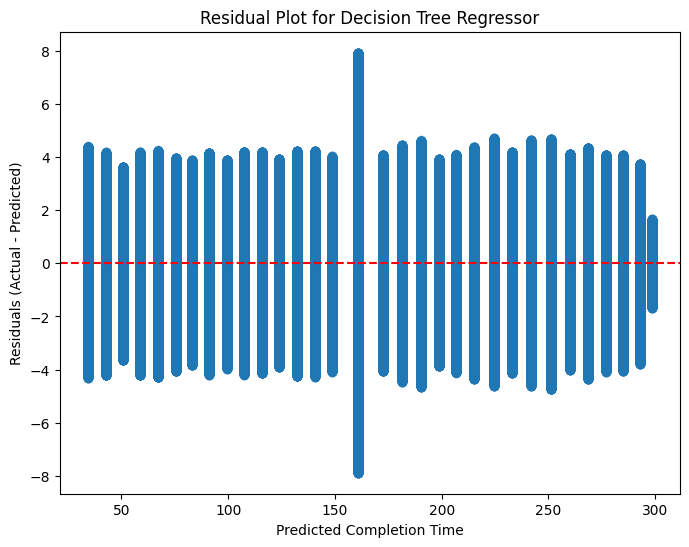

RandomForestRegressor_f0ae16daa19e


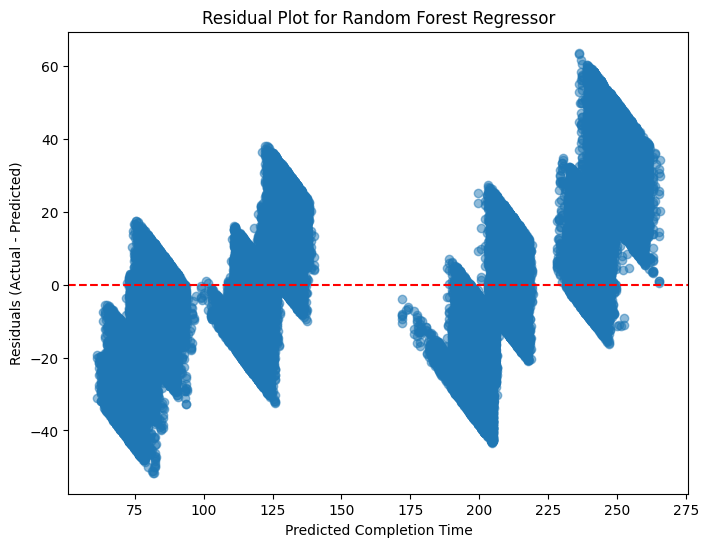

Regression Model Performance (RMSE):
Decision Tree Regressor: 2.5903
Random Forest Regressor: 21.0890


In [ ]:
# evelaute decision tree classifier
#from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Evaluator
#evaluator = MulticlassClassificationEvaluator(labelCol="track_completion_time", predictionCol="prediction", metricName="accuracy")
#evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Evaluate Decision Tree Model
#dt_accuracy = evaluator.evaluate(dt_predictions)

#print(f" Decision Tree Model Accuracy: {dt_accuracy:.4f}")



# Step 7: Apply Regression Models to Predict Track Completion Time
regression_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(labelCol="track_completion_time", featuresCol="features"),
    "Random Forest Regressor": RandomForestRegressor(labelCol="track_completion_time", featuresCol="features")
}

regression_results = {}
for name, model in regression_models.items():
    print(model)
    trained_model = model.fit(train_data)
    predictions = trained_model.transform(test_data)
    
    evaluator = RegressionEvaluator(labelCol="track_completion_time", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)
    
    regression_results[name] = rmse

    # Convert predictions to Pandas DataFrame for visualization
    predictions_pd = predictions.select("track_completion_time", "prediction").toPandas()
    
    # Plot residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions_pd["prediction"], predictions_pd["track_completion_time"] - predictions_pd["prediction"], alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Completion Time")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot for {name}")
    plt.show()

print("Regression Model Performance (RMSE):")
for model, rmse in regression_results.items():
    print(f"{model}: {rmse:.4f}")



In [ ]:
# Define the dictionary of models
classification_models = {
    "Decision Tree": DecisionTreeClassifier(labelCol="difficulty_index", featuresCol="features"),
    "Naive Bayes": NaiveBayes(labelCol="difficulty_index", featuresCol="features"),
    "Random Forest": RandomForestClassifier(labelCol="difficulty_index", featuresCol="features")
}

# Train the Decision Tree model and print feature importances
dt_model = classification_models["Decision Tree"].fit(train_data)
print("Feature Importances:", dt_model.featureImportances)

Feature Importances: (5,[1],[1.0])


### classification metrics

In [ ]:

# Step 10: Compute Classification Metrics (FN, FP, Accuracy, ROC, Precision, Recall)
precision_eval = MulticlassClassificationEvaluator(labelCol="difficulty_index", predictionCol="prediction", metricName="weightedPrecision")
recall_eval = MulticlassClassificationEvaluator(labelCol="difficulty_index", predictionCol="prediction", metricName="weightedRecall")
f1_eval = MulticlassClassificationEvaluator(labelCol="difficulty_index", predictionCol="prediction", metricName="f1")

for name, model in classification_models.items():
    trained_model = model.fit(train_data)
    predictions = trained_model.transform(test_data)
    
    precision = precision_eval.evaluate(predictions)
    recall = recall_eval.evaluate(predictions)
    f1_score = f1_eval.evaluate(predictions)
    
    print(f"{name} Metrics:")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}\n")


Decision Tree Metrics:
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000



Naive Bayes Metrics:
Precision: 0.8750, Recall: 0.8744, F1-Score: 0.8743



Random Forest Metrics:
Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

